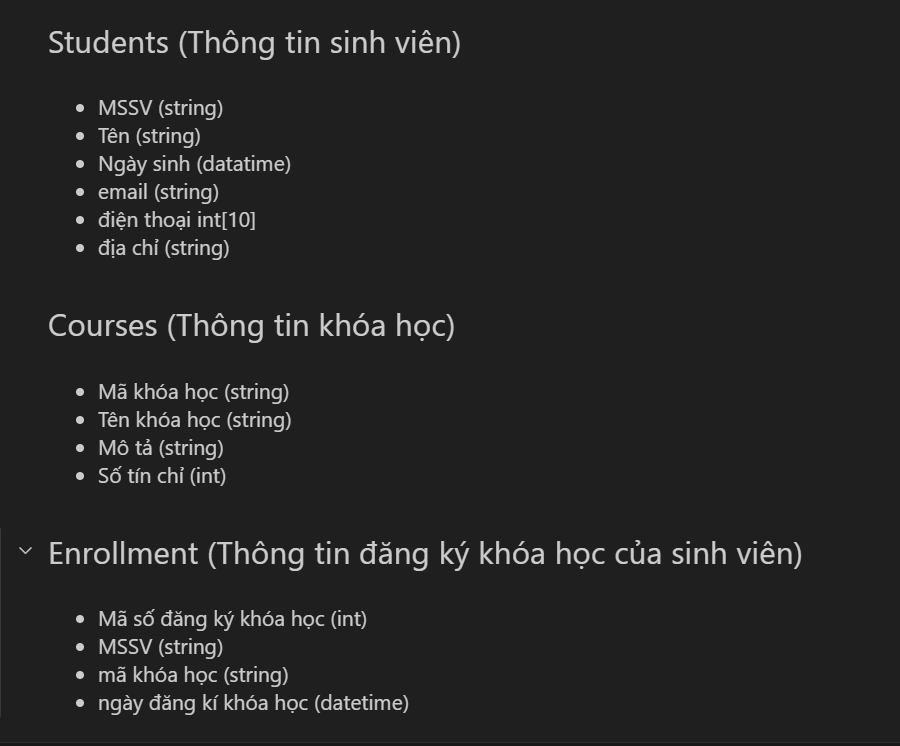

In [1]:
import mysql.connector
from mysql.connector import errorcode

config = {
    'user' : 'root',
    'password': '123456789',
    'host': 'localhost'
}


#Connect to MySQL (Ham bi dong quan trong)
try:
    conn = mysql.connector.connect(**config)
    cursor = conn.cursor()
    print("Connect MySQL Server successfully")
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Connect error, please check username/password")
    else:
        print(err)

#Thu nghiem table da duoc tao chua (Tao ham co the di dong)
def checkTable(input):
    try:
        cursor.execute(input)
        print(f"Create {input} table successfully")
    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_TABLE_EXISTS_ERROR:
            print(f"The table is existing")
        else:
            print(err)

#Thu nghiem connect DB
def checkConn():
    try:
        conn.database = config['database']
        print("Connect DB successfully")
    except mysql.connector.Error as err:
        print("Cannot connect DB")
        print(err)

#Create new DB
try:
    cursor.execute("CREATE DATABASE Python_Connect")
    print("Create DB Successfully")
except mysql.connector.Error as err:
    if err.errno == errorcode.ER_DB_CREATE_EXISTS:
        print("DB Existing")
    else:
        print(err)

Connect MySQL Server successfully
DB Existing


In [2]:
#Tao table
config['database'] = 'Python_Connect'
checkConn() #Phai co truoc khi create 1 table
sqlBook = (
    "CREATE TABLE Books ("
    "  book_id INT AUTO_INCREMENT PRIMARY KEY,"
    "  title VARCHAR(255) NOT NULL,"
    "  author VARCHAR(255),"
    "  published_date DATE"
    ")"
)
checkTable(sqlBook)

Connect DB successfully
The table is existing


In [ ]:
InsertBook1 = ("INSERT INTO Books"
               "(title, author, published_date) "
               "VALUES ('Programming Python', 'Raymond', '2023-01-01')"
               )
try:
    cursor.execute(InsertBook1)
    conn.commit()
    print("Insert Data successfully")
except mysql.connector.Error as err:
    print(f"Error: {err}")
    conn.rollback()


In [4]:
sql_add_book = ("INSERT INTO Books "
                "(title, author, published_date) "
                "VALUES (%s, %s, %s)")
book_data = [
    ('Learning Python', 'Mark Lutz', '2019-06-10'),
    ('Python Crash Course', 'Eric Matthes', '2022-05-12'),
    ('Effective Modern C++', 'Scott Meyers', '2023-12-24'),
    ('The C++ Programming Language', 'Bjarne Strourstrup', '2016-05-20')
]

try:
    cursor.executemany(sql_add_book, book_data)
    conn.commit()
    print("Insert records successfully")
except mysql.connector.Error as err:
    print(f"Error: {err}")
    conn.rollback()

Insert records successfully


In [5]:
select_query = "SELECT * FROM Books"

#Excute Select
try:
    cursor.execute(select_query)
    results = cursor.fetchall()
    for row in results:
        print(f"ID: {row[0]}, Author: {row[1]}, Title: {row[2]}, Published date: {row[3]}")
except mysql.connector.Error as err:
    print(f"Error: {err}")

ID: 1, Author: Programming Python, Title: Raymond, Published date: 2023-01-01
ID: 2, Author: Learning Python, Title: Mark Lutz, Published date: 2019-06-10
ID: 3, Author: Python Crash Course, Title: Eric Matthes, Published date: 2022-05-12
ID: 4, Author: Effective Modern C++, Title: Scott Meyers, Published date: 2023-12-24
ID: 5, Author: The C++ Programming Language, Title: Bjarne Strourstrup, Published date: 2016-05-20


In [7]:
def checkUpdate(input1, input2):
    try:
        cursor.execute(input1, input2)
        conn.commit()
        print("Update data successfully")
    except mysql.connector.Error as err:
        print(f"Error: {err}")
        conn.rollback()

In [ ]:
sql_book_update = ("UPDATE Books "
                   "SET title = %s "
                   "WHERE book_id = %s")
update_data = ('Advanced Python', 1)
checkUpdate(sql_book_update, update_data)

Update data successfully


In [ ]:
sql_delete = "DELETE FROM Books WHERE book_id = %s"

book_id_to_delete = (1,)


In [ ]:
#Close the connection
cursor.close()
conn.close()